In [1]:
from models.Corpus import Corpus  # Import the Corpus class from the models module

# Load the corpus of documents from a specified file
corpus = Corpus.load("./data/corpus.pkl")

# Analyze vocabulary for Reddit documents
reddit_docs = corpus.get_documents_by_type(
    "Reddit"
)  # Retrieve documents of type "Reddit"
reddit_corpus = Corpus(
    "Reddit Analysis"
)  # Create a new Corpus instance for Reddit analysis

# Add each Reddit document to the Reddit corpus
for doc in reddit_docs:
    reddit_corpus.add(doc)

# Build the vocabulary for the Reddit corpus
reddit_vocab = reddit_corpus.build_vocabulary()

# Get the top 10 words by term frequency in the Reddit vocabulary
reddit_top_words = reddit_vocab.nlargest(10, "term_frequency")

# Analyze vocabulary for Arxiv documents
arxiv_docs = corpus.get_documents_by_type("Arxiv")  # Retrieve documents of type "Arxiv"
arxiv_corpus = Corpus(
    "Arxiv Analysis"
)  # Create a new Corpus instance for Arxiv analysis

# Add each Arxiv document to the Arxiv corpus
for doc in arxiv_docs:
    arxiv_corpus.add(doc)

# Build the vocabulary for the Arxiv corpus
arxiv_vocab = arxiv_corpus.build_vocabulary()

# Get the top 10 words by term frequency in the Arxiv vocabulary
arxiv_top_words = arxiv_vocab.nlargest(10, "term_frequency")

# Output the results to the console
print(
    "Top 10 words in Reddit documents:\n", reddit_top_words
)  # Display top words from Reddit
print(
    "Top 10 words in Arxiv documents:\n", arxiv_top_words
)  # Display top words from Arxiv

Top 10 words in Reddit documents:
            word  term_frequency  document_frequency
10          and             145                  38
5           for             114                  38
9        COVID-             114                  38
20           in             114                  38
11          our             108                  38
7   information             102                  38
85       &nbsp;              96                  32
50          are              82                  38
2            to              76                  38
6          more              76                  38
Top 10 words in Arxiv documents:
      word  term_frequency  document_frequency
8     the           11147                 998
41     of            7280                 992
60    and            5948                 989
31     to            4374                 963
37      a            3282                 930
4      in            3115                 917
22     is            1945            

Frequency of 'Coronavirus' over time:
 2024      4.0
2023      9.0
2021     54.0
2022     22.0
2020    177.0
2013      1.0
2012      1.0
2014      0.0
2016      0.0
Name: Coronavirus, dtype: float64


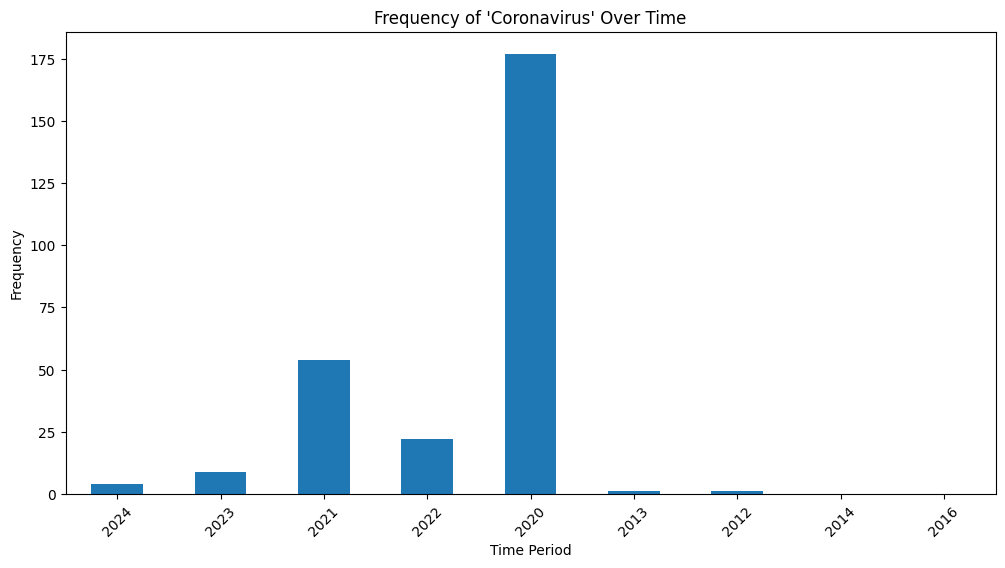

In [2]:
# Specify the word for which to calculate frequency over time
word = "Coronavirus"  # Replace with the word you want to track

# Calculate the frequency of the specified word over time using the corpus
frequency_df = corpus.frequency_over_time(word)

# Display the frequency data for the specified word over time
print(f"Frequency of '{word}' over time:\n", frequency_df)

# Optionally, visualize the results using Matplotlib
import matplotlib.pyplot as plt  # Import the Matplotlib library for plotting

# Create a bar plot to visualize the frequency of the word over time
frequency_df.plot(kind="bar", figsize=(12, 6), title=f"Frequency of '{word}' Over Time")
plt.xlabel("Time Period")  # Label for the x-axis
plt.ylabel("Frequency")  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

In [3]:
# Calculate the Term Frequency-Inverse Document Frequency (TF-IDF) scores for the documents in the corpus
tfidf_df = corpus.calculate_tf_idf()

# Display the calculated TF-IDF scores
print("TF-IDF Scores:\n", tfidf_df)

TF-IDF Scores:
                  word     tfidf
33                the  0.029659
31                 of  0.019571
10                and  0.016392
2                  to  0.012594
146                 a  0.010605
...               ...       ...
8785     biologically  0.000037
8786           gargle  0.000037
18965        ability.  0.000037
18967    non-specific  0.000037
18968  immunoglobulin  0.000037

[18996 rows x 2 columns]


In [4]:
# Calculate BM25 scores for a sample query
query = ["Coronavirus"]  # Replace with your words of interest
bm25_df = corpus.calculate_bm25(query)
print("BM25 Scores:\n", bm25_df)

BM25 Scores:
           word        bm25
0  Coronavirus  355.109766


In [5]:
from models.SearchEngine import (
    SearchEngine,
)  # Import the SearchEngine class from the models module

# Initialize the SearchEngine with the previously loaded corpus
search_engine = SearchEngine(
    corpus
)  # Create an instance of SearchEngine using the corpus

SearchEngine Vocabulary Built.
SearchEngine Term Frequency Matrix built.
SearchEngine TfIdf Matrix Built.


In [6]:
import ipywidgets as widgets  # Import the ipywidgets library for creating interactive widgets
from IPython.display import (
    display,
)  # Import display function to show widgets in Jupyter

# Create a label for the title of the search interface
title_label = widgets.Label(value="Search Engine Interface")

# Create a text input for entering keywords
keywords_input = widgets.Text(
    description="Keywords:", placeholder="Enter keywords separated by commas"
)

# Create an IntSlider for selecting the number of documents to return
num_docs_slider = widgets.IntSlider(
    value=1,  # Default value set to 1
    min=1,
    max=100,
    step=1,
    description="Num Docs:",
    continuous_update=False,  # Update only when the slider is released
)

# Extract authors from the corpus for the author filter
authors = [
    author.name
    for _, author in corpus.authors.items()
    if isinstance(author.name, str) and author.name
]

# Create a Combobox for selecting an author filter
author_filter = widgets.Combobox(
    options=[
        "All Authors",
        *authors,
    ],  # Include all authors and an option for "All Authors"
    value="All Authors",
    description="Author:",
    placeholder="Search or select an author",
    ensure_option=True,  # Ensure that the input matches an option
)

# Create a dropdown for selecting document type
doc_types = ["All Types", "Reddit", "Arxiv"]  # Adjust based on your document types
doc_type_filter = widgets.Dropdown(
    options=doc_types, value="All Types", description="Doc Type:"
)

# Create date range inputs for filtering results by date
start_date_input = widgets.DatePicker(description="Start Date", disabled=False)
end_date_input = widgets.DatePicker(description="End Date", disabled=False)

# Create a button to trigger the search action
search_button = widgets.Button(description="Search")

# Create an Output widget to display the search results
output_area = widgets.Output()

# Add all widgets to a vertical box layout for the interface
ui_with_filters = widgets.VBox(
    [
        title_label,
        keywords_input,
        num_docs_slider,
        author_filter,
        doc_type_filter,
        start_date_input,
        end_date_input,
        search_button,
        output_area,
    ]
)

# Display the user interface with filters
display(ui_with_filters)


def on_search_button_click_with_filters(b):
    # Clear previous output in the output area
    output_area.clear_output()

    # Get values from the input widgets
    keywords = keywords_input.value
    num_docs = num_docs_slider.value
    author = author_filter.value if author_filter.value != "All Authors" else None
    doc_type = doc_type_filter.value if doc_type_filter.value != "All Types" else None
    start_date = start_date_input.value
    end_date = end_date_input.value

    # Display the search results in the Output area
    with output_area:
        results = search_engine.search_with_filters(
            keywords,
            num_docs,
            authors=[author] if author else None,
            doc_type=doc_type if doc_type else None,
            start_date=start_date,
            end_date=end_date,
        )

        # Filter out results with score <= 0
        results = results[results["score"] > 0]

        if results.empty:
            display("No results found.")  # Display message if no results are found
            return

        # Display details for each result
        for index, result in results.iterrows():
            display("***************Doc Details****************")
            display(f"Title: {result.document.titre}")
            display(f"Author: {result.document.authors}")
            display(f"Date: {result.document.date}")
            display(f"Link: {result.document.url}")
            display(f"Type: {result.document.type}")
            display("***************Text****************")
            display(f"{result.document.texte}")

            display(
                f"************{index + 1}.{result.author}************"  # Adjusting for 1-based index
            )
            display(result.document.texte)


# Bind the button click event to the search function
search_button.on_click(on_search_button_click_with_filters)